# Detect fake banknotes using statistical model( Supervised learning)

- Multi-linear regression 
- Logistic regression
- confusion matrix 
- Roc curve


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

from scipy.stats import t, shapiro
from scipy import stats

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import decomposition
from sklearn import preprocessing

In [2]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

In [3]:
# all mesures in mm melimeters 
billets_production = pd.read_csv('billets_production.csv')
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


Notes: Supervised learning :  
- (predictor variables/fetures)s and (Targate variable)
a row and a column for each feture

- Aim of supervised learning is to Predict the target variable, given the predictor variables:
  - Classification: Target variable consists of categories(spam or not spam. True or False , to do or not to do)
  
  - Regression: Target variable is countinuous 
  
- Terms or Naming conventions :
   - Features = predictor variables = independent variables
   - Target variable = dependent variable = response variable 
   
   
- supervised learning
   - Automate time-consuming or expensive manual tasks : E.g :Doctor's diagnosis
   
   OR 
   - Make predictions about the future:
     E.g: Will the customer click on an ad or not?
     

- For supervised learning: 
 - Need :
    - Historical data with labels
    
    OR
    - preform Experiments to get labeled data such as A/B testing to get how many cklic you get .
    
    OR
    - Crowd-sourcing labeled data such as reCAPTCHA this for (text recognation )
    
    
- at any case is to lean from data for wich the right output is known, so we can make predictions on new data for which we don't know the output 
   

- Many way to perform supervised learning in python:
       
     - Scikit-learn/sklearn integrates well with SciPy stack, 
    
- and there is other libraries such as : 
     
   - TensorFlow and
   - Keras)

# Project_discution : 
    
- Features: consist of four length  
   - diagonal;
   - height_left
   - height_right
   - margin_low
   - margin_up
   - length
- Target variables: contain is genuine and have to opetions True or Fals
   - is_genuine (True or False)
   

In [4]:
billets= pd.read_csv('billets.csv',
                     delimiter = ';')  
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [5]:
null_df = billets[billets.isnull().any(axis=1)]

null_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [6]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
billets_fil = billets.fillna(0)
billets_fil

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [8]:
billets_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [9]:
billets_fil.duplicated().sum()

0

- Reminder : sample are the rows, features are the columns
- we have 1500 features and 7 samples

In [10]:
billets_fil.shape

(1500, 7)

In [11]:
billets_fil.keys()

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [12]:
billets_fil['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [13]:
# the mean of each columns 
billets_fil.mean() 

is_genuine        0.666667
diagonal        171.958440
height_left     104.029533
height_right    103.920307
margin_low        4.375313
margin_up         3.151473
length          112.678500
dtype: float64

In [14]:
billets_fil.median()

is_genuine        1.00
diagonal        171.96
height_left     104.04
height_right    103.92
margin_low        4.30
margin_up         3.14
length          112.96
dtype: float64

# summary stat 

In [15]:
billets_fil

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [16]:
# 1000 banknots are True 
true = billets_fil[billets_fil['is_genuine']== True]
true

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
995,True,171.66,103.92,103.47,4.26,2.83,113.20
996,True,172.16,103.72,103.61,4.30,2.72,113.51
997,True,171.78,103.38,104.22,4.23,3.07,113.77
998,True,171.44,103.96,103.92,3.68,2.89,113.21


# check the outliers 

In [17]:
billets_fil

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [18]:
billets_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [19]:
billets_fil.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.375313,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.956158,0.231813,0.87273
min,171.040000,103.140000,102.820000,0.000000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,3.990000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.300000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


<AxesSubplot:xlabel='is_genuine', ylabel='count'>

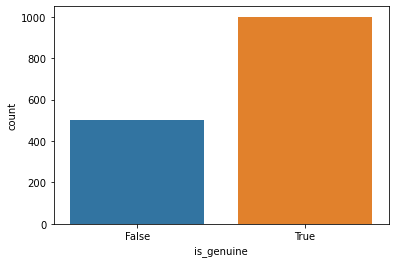

In [20]:
sns.countplot(x ='is_genuine', data = billets_fil)


- befour bulding the module, we transform the values of out default variable from text(True/False ) into numbers (0/1) beacuse stamodel only works on numerical values

In [21]:
billets_fil.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.560133,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.064282,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.232538,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.280082,0.307005,-0.401751
margin_low,-0.560133,-0.064282,0.232538,0.280082,1.000000,0.323598,-0.471358
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.323598,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.471358,-0.520575,1.000000


# matrice of corr

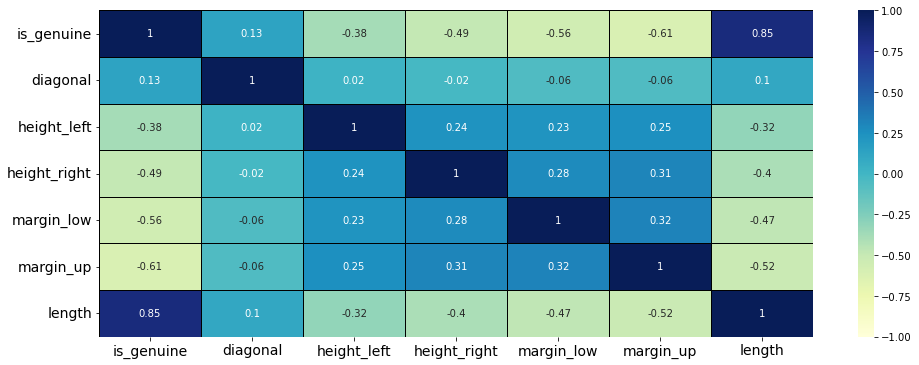

In [22]:
matrice_corr = billets_fil.corr().round(2)
plt.figure(figsize=(16, 6))

sns.heatmap(data=matrice_corr, annot=True,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1)
plt.yticks(rotation=0,fontsize = 14) 
plt.xticks(rotation=0,fontsize = 14,va="top") 
plt.show()

- notes: 
    
    we can find a corrlation between "margin_low", and 'margin_up'
    while they are not corrlated to the variible "is_genuine"
    
    
- so for that i did multi-regression analysis to find the missng values


# Multi-linear Regression

In [23]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length',
                    data=billets_fil).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 24 May 2022   Prob (F-statistic):          7.29e-119
Time:                        17:30:43   Log-Likelihood:                -1777.1
No. Observations:                1500   AIC:                             3568.
Df Residuals:                    1493   BIC:                             3605.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -11.4630     15

- Notes: 
   - each varibales that his P-value is biger or greater than the sicnifcant mark 0.05 i will remove it 

- so for that using the orginal data to predict the missing values

In [24]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets_fil).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     342.9
Date:                Tue, 24 May 2022   Prob (F-statistic):          2.60e-123
Time:                        17:30:43   Log-Likelihood:                -1777.8
No. Observations:                1500   AIC:                             3562.
Df Residuals:                    1497   BIC:                             3578.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.4818      0

- we could see that The p-value of the variables are less than 5%.

In [25]:
null_data = null_df

# J'enregistre mes predictions
pred_reg = reg_multi.predict(null_data)
pred_reg.head()

72     3.976096
99     3.987567
151    4.000081
197    3.937513
241    4.000081
dtype: float64

# results of Mulit_liner_reg

In [26]:
alpha = 0.05




In [27]:
n = billets_fil.shape[0]
p = 3

In [28]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
analyses['obs'].astype('float')

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
1495    1496.0
1496    1497.0
1497    1498.0
1498    1499.0
1499    1500.0
Name: obs, Length: 1500, dtype: float64

- We calculate the levers knowing that the threshold of the levers is "2∗𝑝𝑛"

In [29]:
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

threshold_lever = 2*p/n

- The calculation of the levers will allow me to detect atypical or influential values.

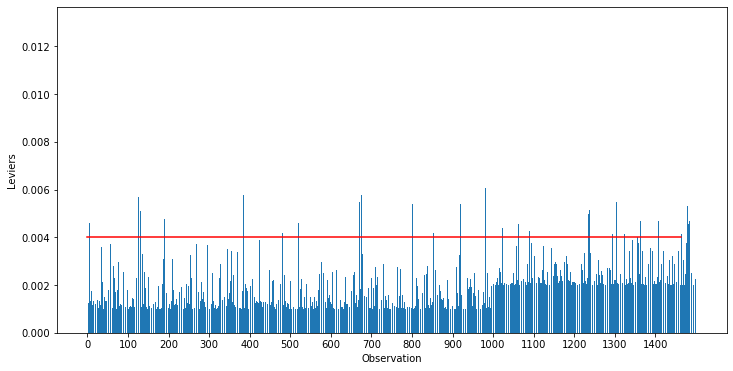

In [30]:
plt.figure(figsize=(12,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [threshold_lever, threshold_lever], color='r')
plt.show()

- To select the points for which the leverage is greater than the threshold, we execute the following line:

In [31]:
analyses.loc[analyses['levier'] > threshold_lever, :]

,obs,levier
4,5,0.004594
48,49,0.007109
52,53,0.010288
54,55,0.004265
125,126,0.005672
...,...,...
1478,1479,0.005297
1479,1480,0.004271
1481,1482,0.004542
1483,1484,0.004685



# Studentized Residuals<a class="anchor" id="section_3_2"></a>

- Principle: Compare the value of y and the prediction of y.

- To do this, the residual is normalized by the standard deviation.

In [32]:
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
threshold_rstudent = t.ppf(1-alpha/2,n-p-1)

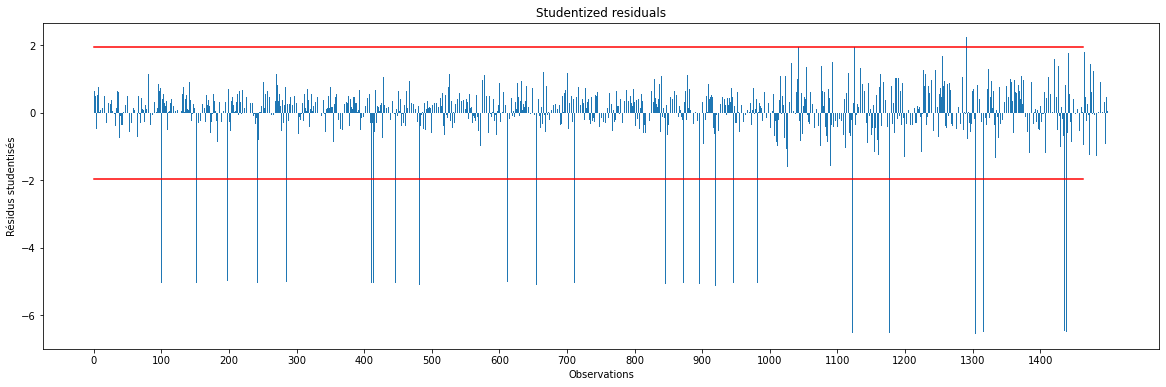

In [33]:
plt.figure(figsize=(20,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observations')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1463], [threshold_rstudent, threshold_rstudent], color='r')
plt.plot([0, 1463], [-threshold_rstudent, -threshold_rstudent], color='r')
plt.title("Studentized residuals")
plt.show()

# Distance of Cook<a class="anchor" id="section_3_3"></a>

Principle: Globally compare the coefficients when point n°i participates or not in the regression. We
measures the influence of a point on the estimated coefficients.

In [34]:
influence = reg_multi.get_influence().summary_frame()

In [35]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

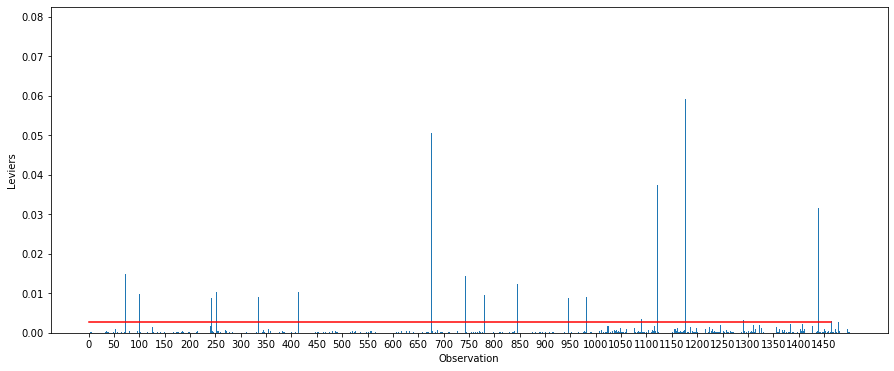

In [36]:
plt.figure(figsize=(15,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1463, step=50))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_dcook, seuil_dcook], color='r')
plt.show()

# Colinéarité des variables<a class="anchor" id="section_3_4"></a>

To check if the independent variables are not correlated with each other (because in this case it is difficult to estimate the individual effects on the dependent variable).
I use the VIF (Variance Inflation Factor):

In [37]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5811624794799994, 1.5811624794799992]

- The coefficients are less than 10, there are no collinearity problems of my variables.

# Homoscedasticity test <a class="anchor" id="section_3_5"></a>

- To check the constancy of variance of the residuals. We use the Breusch Pagan test with the null hypothesis of homoscedasticity

In [38]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.264180238256536


In [39]:
f_pval

0.26457203117980854

- With a p-value less than 5%, we can reject the hypothesis that the variances are constant

# Test for normality of residuals<a class="anchor" id="section_3_6"></a>

In [40]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.6298308372497559, pvalue=0.0)

In [41]:
analyses['residu_s'] = reg_multi.resid

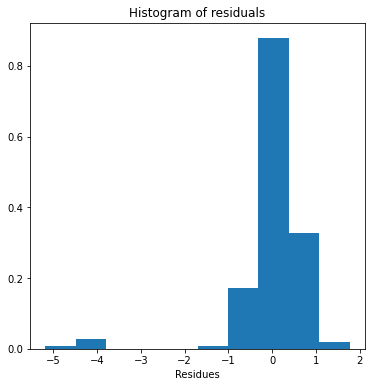

In [42]:
plt.figure(figsize=(6,6))
plt.hist(analyses['residu_s'], density=True)
plt.xlabel('Residues')
plt.title('Histogram of residuals')
plt.show()

- Creation of a QQ-plot

<Figure size 576x576 with 0 Axes>

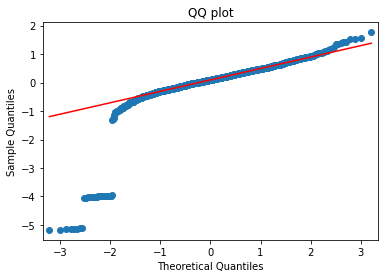

In [43]:

plt.figure(figsize=(8,8))
fig = sm.qqplot(reg_multi.resid, line='q')
plt.title('QQ plot')
plt.show()

The Q-Q plot is a graphical tool to assess the relevance of the adjustment of a given distribution to a theoretical model.

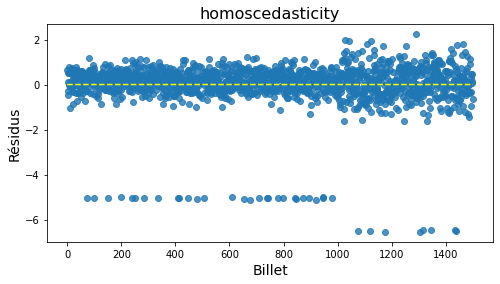

In [44]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=billets_fil.index, y=analyses['rstudent'], alpha=0.8)
plt.plot(np.repeat(0, len(billets_fil.index)+2), color='yellow', linestyle='--')

plt.ylabel('Résidus', fontsize=14)
plt.xlabel('Billet', fontsize=14)
plt.title('homoscedasticity', fontsize=16)
plt.show()  

- we could see that the  homoscedasticity, the linear model is robust and my file contains more than 30 individuals.

# Imputation of missing values<a class="anchor" id="chapter4"></a>

In [45]:
null_df['margin_low'] = pred_reg.round(2)

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_18627/1454101828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df['margin_low'] = pred_reg.round(2)


In [46]:
df = pd.concat([billets_fil, null_df], axis=0)

In [47]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,171.957723,104.027820,103.919193,4.372180,3.149941,112.682062
std,0.304944,0.299315,0.326993,0.947617,0.232133,0.872246
min,171.040000,103.140000,102.820000,0.000000,2.270000,109.490000
25%,171.750000,103.820000,103.710000,3.990000,2.990000,112.050000
50%,171.950000,104.040000,103.920000,4.290000,3.140000,112.960000
75%,172.160000,104.230000,104.150000,4.850000,3.310000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.440000


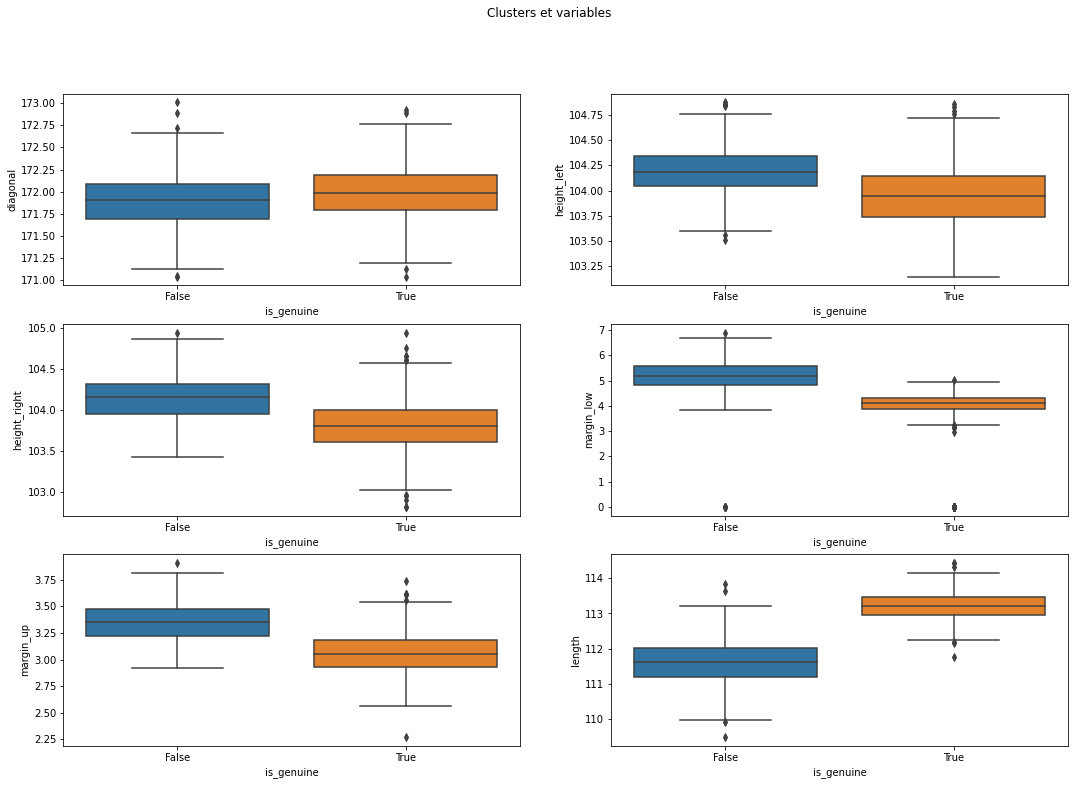

In [48]:

fig, axes = plt.subplots(3, 2, figsize=(18, 12))

fig.suptitle('Clusters et variables')

sns.boxplot(ax=axes[0, 0], data= df, x='is_genuine', y='diagonal')
sns.boxplot(ax=axes[0, 1], data= df, x='is_genuine', y='height_left')
sns.boxplot(ax=axes[1, 0], data= df, x='is_genuine', y='height_right')
sns.boxplot(ax=axes[1, 1], data= df, x='is_genuine', y='margin_low')
sns.boxplot(ax=axes[2, 0], data= df, x='is_genuine', y='margin_up')
sns.boxplot(ax=axes[2, 1], data= df, x='is_genuine', y='length')

plt.show()

# PCA

In [49]:
X= df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length']].round(2)
names = df['is_genuine']
nom_variable = ['diagonal','height_left','height_right','margin_low','margin_up','length']

In [50]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [51]:
pca = decomposition.PCA(n_components=6) #correspond aux 6 variables 
pca.fit(X_scaled)

PCA(n_components=6)

In [52]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())

[2.38440527 1.01456194 0.7795342  0.7236919  0.67582221 0.42589073]
[0.39714232 0.56612596 0.6959638  0.81650064 0.92906439 1.        ]


In [53]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rank of the axis of inertia")
    plt.ylabel("inertia percentage")
    plt.title("Eigenvalue scree")
    plt.show(block=False)

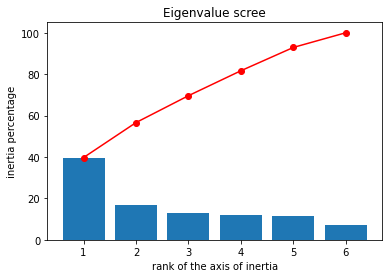

In [54]:
display_scree_plot(pca)

In [55]:
# Calcul des composantes principales
n_comp = 2
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=2)

In [56]:
# Fonction qui me permet d'afficher les cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

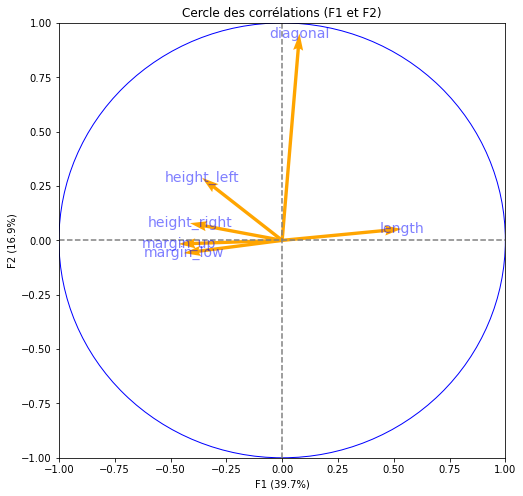

In [57]:
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1),(0,2)], labels = np.array(nom_variable))

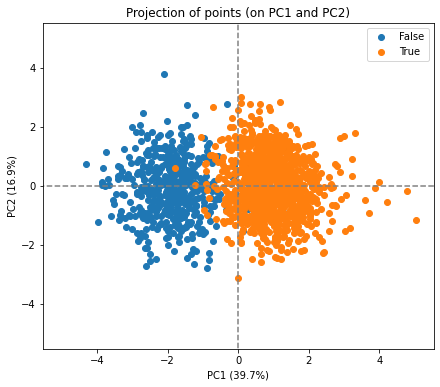

<Figure size 432x288 with 0 Axes>

In [58]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2)], illustrative_var=np.array(names))
plt.figure()
plt.show()

# Logistic Regression Model

- split the dataset into training and test set: 

In [59]:
# Logistic regression

In [60]:
X = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']].values
y = df['is_genuine']
y=y.astype('int')


#fraction de la df 
x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.75,random_state=0)

#instanciation du modèle
MylogRegression = linear_model.LogisticRegression(random_state = 0,solver='liblinear')

#training
MylogRegression.fit(x_train,y_train)

#précision du modèle
precision = MylogRegression.score(x_test,y_test)
print(precision*100)

98.44155844155844


In [61]:
MylogRegression.predict_proba(x_test)


array([[9.85324537e-01, 1.46754626e-02],
       [4.90136990e-03, 9.95098630e-01],
       [1.17104410e-03, 9.98828956e-01],
       [1.71662336e-03, 9.98283377e-01],
       [9.33372462e-01, 6.66275380e-02],
       [4.67096131e-02, 9.53290387e-01],
       [9.99883387e-01, 1.16613191e-04],
       [9.99831689e-01, 1.68311409e-04],
       [9.87606275e-01, 1.23937252e-02],
       [9.99056015e-01, 9.43984837e-04],
       [6.30690520e-03, 9.93693095e-01],
       [7.61700404e-04, 9.99238300e-01],
       [8.93769321e-02, 9.10623068e-01],
       [8.75201297e-01, 1.24798703e-01],
       [9.91938464e-01, 8.06153581e-03],
       [3.58504199e-04, 9.99641496e-01],
       [1.98370918e-03, 9.98016291e-01],
       [5.62353589e-04, 9.99437646e-01],
       [9.97668123e-01, 2.33187661e-03],
       [9.07408043e-02, 9.09259196e-01],
       [1.69865413e-03, 9.98301346e-01],
       [8.84204013e-01, 1.15795987e-01],
       [9.12895042e-02, 9.08710496e-01],
       [1.92699082e-02, 9.80730092e-01],
       [2.895124

In [62]:
confusion_matrix(y_test, MylogRegression.predict(x_test))



array([[124,   5],
       [  1, 255]])

# Confusion Matrex

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


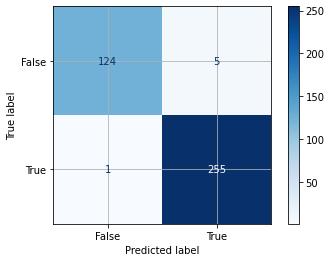

In [78]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(MylogRegression, x_test, y_test, cmap='Blues',
                      display_labels=['False', 'True'])
plt.grid(None);

# Accuracy 

In [64]:
print(classification_report(y_test, MylogRegression.predict(x_test)))


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       129
           1       0.98      1.00      0.99       256

    accuracy                           0.98       385
   macro avg       0.99      0.98      0.98       385
weighted avg       0.98      0.98      0.98       385



# The traning results

- test accuracy, the confusion matrix, and even the cross-validation score are the same as the sklearn implementation. But, there is a problem with getting the same results every time when fitting the model, and for that not sure why the results are different every time although I have already set the random seed for NumPy to be 42. So i may have to repeat the model creation and training a few times to obtain the same result with the sklearn implementation. 

# Visualizations


- Notes: 
   - the main purpose of a logistic regression model is to be able to classify the samples.
   - To assess the classification performance of the model, there are two things you can look at:
     - The output of the logit function.
     - The predicted class for all the samples.



this regression we can 249 True and 120 False , it means the algo is doing good with prediction 


- some notes :

- Results : 
- the raw model can be any number , but the probabilites are numbers between 0 and 1. , so this way is to squash the raw model output to be between 0 and 1 , the sigmoid function takes care of that 


- finally we can see that each banknote with there actual genuity if they are False or True

- The logistic regression model finds the correct decision boundary between True and Fulse  depending on dimensions size that have been provided . The line is the logistic function shifted and squeezed to fit the data.



- more explanation about the logistic regression:

    - Logistic regression is the linear regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all linear regressions the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more continuous-level (interval or ratio scale) independent variables.


# The ROC-AUC classification metric

- this is to evaluate classification models using a new metric called ROC-AUC

- the standard classification metric is the accuracy which is define as the number of samples correctly classified over the total number of samples.
- the accuracy is natural metric, but it does fall short in the contexxt of highly imbalanced datasets, where the positive class you whant to detect or predict is rare compared to the negative class

In [65]:
from sklearn.metrics import roc_curve


<Figure size 432x288 with 0 Axes>

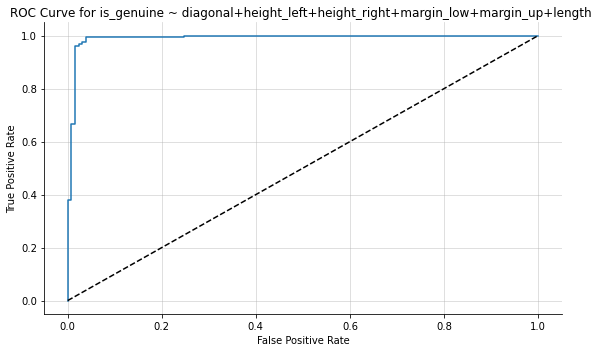

In [66]:


logit_roc_auc = roc_auc_score(y_test, MylogRegression.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, MylogRegression.predict_proba(x_test)[:,1])
plt.figure()

fig, ax  = plt.subplots(1,1, figsize = (8,5))
plt.plot(fpr, tpr, label=  " Logistic Regression (area = %0.2f)" % logit_roc_auc)
# Création d'une courbe ROC

plt.plot([0,1], [0,1], 'k--')
plt.title ('ROC Curve for is_genuine ~ diagonal+height_left+height_right+margin_low+margin_up+length ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(alpha = 0.5)
sns.despine()
plt.tight_layout()



In [67]:
#  it mesure the quality of the classification , if it is close to 1 so i have a good model , 


# k-mean clustring

In [68]:
n_clust = 2

# Clustering par K-means
km = KMeans(n_clusters=n_clust,random_state=0)
km.fit(x_test)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [69]:
pca_kmeans = decomposition.PCA(n_components=6).fit(x_test)
X_projected = pca_kmeans.transform(x_test)

In [70]:
centroids = km.cluster_centers_
centroids_projected = pca_kmeans.transform(centroids)

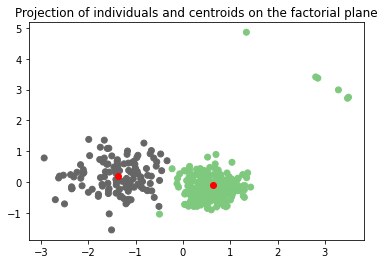

In [71]:
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters,cmap='Accent')
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], color='red')
plt.title("Projection of individuals and centroids on the factorial plane")
plt.show()

In [72]:
y_pred_kmean = km.predict(x_test)

In [73]:
print("ConfusionMatrix",confusion_matrix(y_test,y_pred_kmean))
print(classification_report(y_test,y_pred_kmean))


ConfusionMatrix [[  8 121]
 [255   1]]
              precision    recall  f1-score   support

           0       0.03      0.06      0.04       129
           1       0.01      0.00      0.01       256

    accuracy                           0.02       385
   macro avg       0.02      0.03      0.02       385
weighted avg       0.02      0.02      0.02       385



# Confusion Matrix kmean

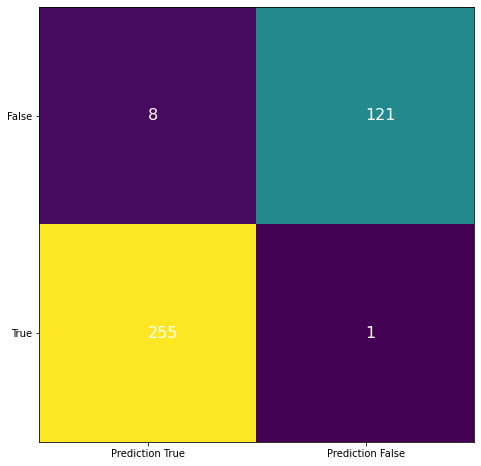

In [79]:
cm = confusion_matrix(y_test,y_pred_kmean)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm,cmap='viridis')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Prediction True','Prediction False'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('False', 'True'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], fontsize=16,ha='left',va='center', color='white')
plt.show()

# Final

#  Algorithme

In [80]:
test = pd.read_csv('billets_production.csv')


In [81]:

#create a first function that will allow me to test my file with the two algorithms

def test_billet(test) : 
    
    # then creat a copy 
    X_final = test.iloc[:,:-1]
       
    # then I apply prediction by logistic regression
    res = MylogRegression.predict(X_final.values)
    res_proba = MylogRegression.predict_proba(X_final.values)[:,-1]
    
    # I create a list in which I indicate that if the value of i 
    #is greater than 0.5 it will take the value of True
    predict=[]
    for i in res_proba:
        if i >= 0.5 : predict.append(True)
        else : predict.append(False)
    
    #create a column that displays the prediction in % and another that displays the answer
    test["prediction_% LogReg"]=res_proba
    test["Response LogReg"]=predict  

    return(test[["id", "prediction_% LogReg", "Response LogReg"]].set_index('id'))


In [82]:
print(test_billet(test))

     prediction_% LogReg  Response LogReg
id                                       
A_1             0.008551            False
A_2             0.010044            False
A_3             0.000657            False
A_4             0.890763             True
A_5             0.999367             True


# End
